In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#this is another method which uses decision trees as the building block
#they tend to build the tree in the serial manner where each tree try to correct the mistakes of the previous ones
#there is no randomization but strong pre pruning is used
#they often use very shallow trees of depth one to five
#more and more trees are adder to itiratively improve the performance of the tree
#another important feature of the gradient boosting tree is the learning rate
#it controls how strongly each try tries to correct the mistakes of the other
#higher learning_rate and n_estimators means the model complexity is going to be high

#importing the data set and splitting it
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target)

In [4]:
#importing the model and fitting the model
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
#the default setting is maximum depth 3 , learning rate = 0.1 , n_estimators = 100
gbrt.fit(X_train , y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [5]:
#printing the accuracies
print("Train accuracy : " , gbrt.score(X_train , y_train))
print("Test accuracy : " , gbrt.score(X_test , y_test))
#this is overfitting the model

Train accuracy :  1.0
Test accuracy :  0.951048951048951


In [6]:
#there are two ways to less overfit the model
#decreasing max_depth = 1
gbrt2 = GradientBoostingClassifier(random_state = 0 , max_depth = 1)
gbrt2.fit (X_train , y_train)
print("Train accuracy : " , gbrt2.score(X_train , y_train) )
print("Test accuracy : "  , gbrt2.score(X_test , y_test))

Train accuracy :  0.9882629107981221
Test accuracy :  0.9790209790209791


In [7]:
#decreasing the learning rate to reduce the complexity
gbrt3 = GradientBoostingClassifier(random_state = 0 , learning_rate = 0.01)
gbrt3.fit(X_train , y_train)
print("Train accuracy : " , gbrt3.score(X_train , y_train))
print("Test accuracy : " , gbrt3.score(X_test , y_test))

Train accuracy :  0.9835680751173709
Test accuracy :  0.9300699300699301


Text(0.5,1,'Feature_importances')

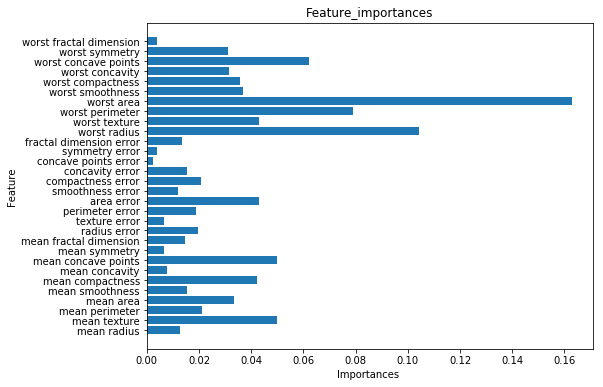

In [8]:
#visualising the feature_importances
plt.figure(figsize = (8 , 6))
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature) , gbrt.feature_importances_ , align = 'center')
plt.yticks (np.arange(n_feature), cancer.feature_names)
plt.xlabel("Importances ")
plt.ylabel("Feature")
plt.title("Feature_importances")
